# **Введение в машинное обучение : рекомендация тарифов**

## Импорт и предобработка данных

**Импорт библиотек и настройки**

In [220]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings

In [221]:
warnings.filterwarnings('ignore')

**Импорт данных**

In [222]:
try:
    data = pd.read_csv('/datasets/users_behavior.csv') # путь к данным для сетевой версии
except: 
    data = pd.read_csv('users_behavior.csv')  # путь к данным для локальной версии

In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [224]:
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


**Промежуточные выводы**

Согласно условиям задания данные уже предобработаны - названия столбцов согласно правилам, пропуска отсутствуют, описание данных в столбцах в наличии.

____


## Разделение исходных данных на обучающую, валидационную и тестовую выборки.

In [225]:
# определяем признаки и целевой признак
features = data.drop(['is_ultra'], axis=1) #признаки
target = data['is_ultra'] #целевой признак

In [226]:
# разделяем исходные данные на обучающую(60%) валидационную (20%) и тестовую(20%) выборки

# первым шагом отделяем тестовые данные
features_train, features_test, target_train, target_test = train_test_split(
   features, target, test_size=0.2, random_state=12345)

# вторым шагом отделяем валидационные данные
features_train, features_valid, target_train, target_valid = train_test_split(
   features_train, target_train, test_size=0.25, random_state=12345)


In [227]:
#features_train.info()
features_train.shape

(1928, 4)

In [228]:
#features_valid.info()
features_valid.shape

(643, 4)

In [229]:
#features_test.info()
features_test.shape

(643, 4)

**Промежуточные выводы**

Данные успешно разделены на обучающую, валидационную и тестовую выборку в пропорции 3:1:1

---

## Применение модели DecisionTreeClassifier

Accuracy лучшей модели: 0.7744945567651633
max_depth лучшей модели: 7


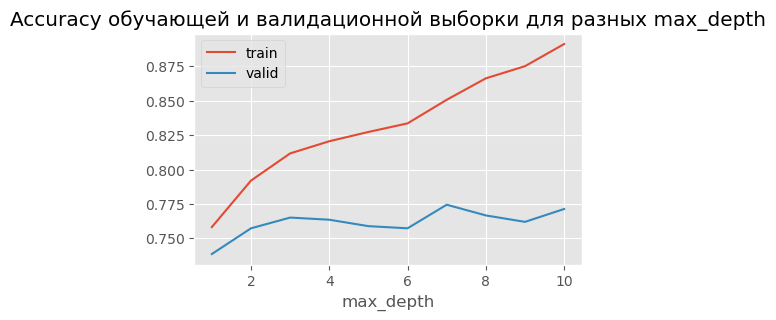

In [230]:
best_model_dtc = None
best_result_dtc = 0
best_depth_dtc = 0

plot_data=[]

for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # создаем модель
    model.fit(features_train, target_train) # обучаем модель
    predictions = model.predict(features_valid) # получаем предсказания модели на валидационных данных
    result = accuracy_score(target_valid, predictions) # оцениваем качество модели по валидационным ответам

    result_train = accuracy_score(target_train, model.predict(features_train))

    plot_data.append([depth,  result_train, result])
    if result > best_result_dtc: # сохраняем лучшую модель
        best_model_dtc = model
        best_result_dtc = result
        best_depth_dtc = depth

mpl.style.use('ggplot') # добавим стиля
plot_data = pd.DataFrame(plot_data)
plot_data.columns = ['max_depth','train','valid']
plot_data.set_index(['max_depth'], inplace=True)
plot_data.plot(figsize=(5,3), title='Accuracy обучающей и валидационной выборки для разных max_depth')
        
print("Accuracy лучшей модели:", best_result_dtc)
print("max_depth лучшей модели:", best_depth_dtc)

plt.show()

**Промежуточные выводы**

Модель дерева решений с максимальной глубиной в 3 уровня показала наилучшие результаты по валидационной выборке, accuracy выше заложенного в задание порога 0.75

---

## Применение модели RandomForestClassifier

Accuracy лучшей модели: 0.7978227060653188
Количество деревьев: 50
max_depth лучшей модели: 10


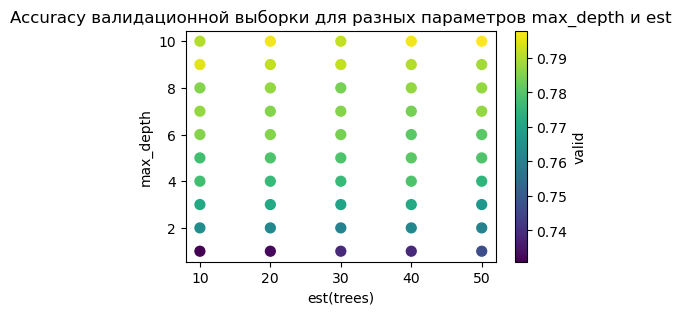

In [231]:
best_model_rfc = None
best_result_rfc = 0
best_est = 0
best_depth_rfc = 0

plot_data=[]

for est in range(10, 51, 10): # протестируем разное количество деревьев, от 10 до 50 с шагом 10
    for depth in range (1, 11):  
        model =  RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)# создаем модель 
        model.fit(features_train, target_train) # обучаем модель
        predictions = model.predict(features_valid) # получаем предсказания модели на валидационных данных
        result = accuracy_score(target_valid, predictions) # оцениваем качество модели по валидационным ответам
        
        plot_data.append([est, depth, result])
            
        if result > best_result_rfc:
            best_model_rfc = model
            best_result_rfc = result
            best_est = est
            best_depth_rfc = depth

print("Accuracy лучшей модели:", best_result_rfc)
print("Количество деревьев:", best_est)
print("max_depth лучшей модели:", best_depth_rfc)

# оторбразим на графике
mpl.style.use('default') 
plot_data = pd.DataFrame(plot_data)
plot_data.columns = ['est(trees)', 'max_depth', 'valid']
plot_data.plot.scatter(x='est(trees)', y='max_depth', s=50, c='valid', cmap="viridis",  figsize=(5,3), 
                       title='Accuracy валидационной выборки для разных параметров max_depth и est')
plt.show()

**Промежуточные выводы**

Модель случайного леса из 50 деревьев и с глубиной 10 показала наилучшие результаты по валидационной выборке, accuracy выше заложенного в задание порога 0.75

---

## Применение модели LogisticRegression

In [232]:
model = LogisticRegression(random_state=12345)   
model.fit(features_train, target_train) 
predictions = model.predict(features_valid)  

result = accuracy_score(target_valid, predictions)
print("Accuracy линейной модели:", result)

Accuracy линейной модели: 0.7262830482115086


**Промежуточные выводы**

Классификация с моделью логистической регрессии дает accuracy меньше целевого уровня 0.75

---

## Проверка лучшей модели на тестовых данных

Наилучшим образом себя показала модель RandomForestClassifier (`best_model_rfc`). Проверим результаты ее работы на тестовой выборке

In [233]:
best_model = best_model_rfc

#переобучим лучшую модель на объединенных данных из обучающей и валидационной выборок
features_combine = pd.concat([features_train,features_valid])
target_combine = pd.concat([target_train,target_valid])
model.fit(features_combine, target_combine) # переобучаем модель

# проверим точность модели на тестовых данных
predictions = best_model.predict(features_test)
result = accuracy_score(target_test, predictions)

print("Accuracy лучшей модели на тестовой выборке:", result)

Accuracy лучшей модели на тестовой выборке: 0.7993779160186625


**Промежуточные выводы**

Модель случайного леса показала себя достойно на тестовой выборке, результаты такие же, как и на валидационной - accuracy почти 80%

---

## Проверка метрик качества наилучшей модели

Проверим прочие метрики модели на тестовой выборке

Precision лучшей модели на тестовой выборке: 0.5204081632653061
Recall лучшей модели на тестовой выборке: 0.7445255474452555


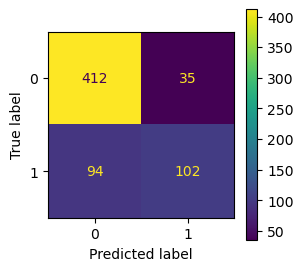

In [234]:
predictions = best_model.predict(features_test) # получаем предсказания модели на валидационных данных

print("Precision лучшей модели на тестовой выборке:", precision_score(predictions, target_test ))
print("Recall лучшей модели на тестовой выборке:", recall_score(predictions, target_test))

mpl.style.use('default')  
cm = confusion_matrix(target_test, predictions, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
fig, ax = plt.subplots(figsize=(3,3)) 
disp.plot(ax=ax)

plt.show()

**Проверка модели на вменяемость**

In [235]:
# создадим DummyClassifier для оценки поведения алгоритма, всегда предсказывающего самый популярный ответ
model_dummy = DummyClassifier(strategy="most_frequent")
model_dummy.fit(features_combine, target_combine)
predictions = model_dummy.predict(features_test)

result = accuracy_score(target_test, predictions)
print("Accuracy dummy модели:", result)

Accuracy dummy модели: 0.6951788491446346


**Промежуточные выводы**

Точность (англ. precision) 0.515 показывает, что модель **52% целевой аудитории тарифа «Ультра» получат соответствующую рекомендацию от модели**. Остальным потенциальным пользователям - порекомендует менее подходящий тариф «Смарт»

Полнота (англ. recall) 0.7 показывает, что **70% рекомендаций тарифа «Ультра» приходятся на адресатов из целевой категории**, 30% получат рекомендацию этого тарифа, хотя им больше подойдет «Смарт»

Проверка на вменяемость проводилась в сравнении с моделью, всегда возвращающей самый популярный ответ. Accuracy такой модели - 69.5%. Accuracy лучшей модели - 80%, что значительно выше dummy результатов. Проверка пройдена.

---

## Общий вывод

- Согласно условиям задания данные уже предобработаны, так что импортированные данные не потребовали дополнительных усилий по предобработке.
- Исходные данные были разделены на обучающую, валидационную и тестовую выборку в пропорции 3:1:1
- было испытано 2 варианта модели - решающее дерево и случайный лес, при этом в цикле был проверен набор разных гиперпараметров для поиска наилучших настроек для каждой из моделей
- по итоговому рейтингу accuracy лучшей оказалась модель случайный лес из 50 деревьев с глубиной 10
- лучшая модель была проверена на тестовой выборке, где удовлетворила требованиям задания, набрав accuracy почти 80%
- были проверены дополнительные метрики precision и recall
- precision 52% говорит, что половина пользователей из целевой группы тарифа "Ультра" выявляются моделью, другая половина получает в рекомендациях тариф "Смарт"
- recall 70% показывает, что соответствющий процент пользователей правомерно получит рекомендацию тарифа "Ультра"
- проведена проверка на вменяемость. Для модели, возвращающей самый популярный ответ точность составила 60%, у обученной модели 80%